DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E61A196910>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E61A196910> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


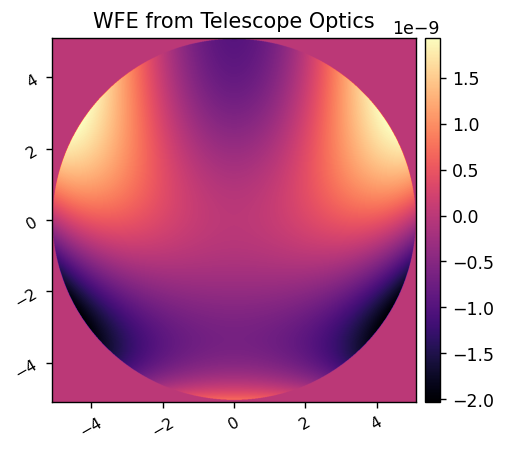

In [13]:
import numpy as np
import cupy as cp
import poppy
xp = cp if poppy.accel_math._USE_CUPY else np

from poppy.poppy_core import PlaneType

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display

from importlib import reload

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)

poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

from prop_models import full, compact, agpm
reload(full)
reload(compact)
reload(agpm)

from wfsc_1dm import efc, pwp, utils

import misc_funs as misc

pupil_diam = 10.2*u.mm
wavelength_c = 750e-9*u.m

vortex = agpm.IdealAGPM(name='VVC', wavelength=wavelength_c, charge=6)

lyot_stop_physical = poppy.CircularAperture(name='Lyot Stop', radius=3*u.mm)
lyot_stop_compact = poppy.CircularAperture(name='Lyot Stop', radius=3*u.mm * 500/350)

hdr = fits.getheader('wfe_on_axis.fits')
ote_wfe = poppy.FITSOpticalElement(opd='wfe_on_axis.fits', opdunits='meters',
                                   pixelscale=pupil_diam.to_value(u.m)/hdr['NAXIS1'])
misc.imshow1(ote_wfe.opd, 'WFE from Telescope Optics', pxscl=ote_wfe.pixelscale.to(u.mm/u.pix))



In [11]:
pointing_error = 1*u.mas

pointing = 


In [14]:
poppy_log.disabled = False

m1_diam = 6.5*u.m
m2_diam = 700*u.mm
m3_diam = 800*u.mm
m3_dims = [800*u.mm, 700*u.mm]

m4_diam = 100*u.mm

seeds = (1,2,3,4)

m1surf = poppy.StatisticalPSDWFE('M1 Surface OPD', index=3.0, wfe=20*u.nm, radius=m1_diam/2, seed=seeds[0])
m2surf = poppy.StatisticalPSDWFE('M2 Surface OPD', index=3.0, wfe=20*u.nm, radius=m2_diam/2, seed=seeds[1])
m3surf = poppy.StatisticalPSDWFE('M3 Surface OPD', index=3.0, wfe=20*u.nm, radius=m3_diam/2, seed=seeds[2])
m4surf = poppy.StatisticalPSDWFE('M4 Surface OPD', index=3.0, wfe=20*u.nm, radius=m4_diam/2, seed=seeds[3])

npix = 1024
oversample = 1

m1wf = poppy.FresnelWavefront(beam_radius=m1_diam/2, npix=npix, oversample=oversample)
m1errs = m1surf.get_opd(m1wf)
misc.imshow1(m1errs)

m2wf = poppy.FresnelWavefront(beam_radius=m2_diam/2, npix=npix, oversample=oversample)
m2errs = m2surf.get_opd(m2wf)
misc.imshow1(m2errs)

m3wf = poppy.FresnelWavefront(beam_radius=m3_diam/2, npix=npix, oversample=oversample)
m3errs = m3surf.get_opd(m3wf)
misc.imshow1(m3errs)

m3errs = 

m4wf = poppy.FresnelWavefront(beam_radius=m4_diam/2, npix=npix, oversample=oversample)
m4errs = m4surf.get_opd(m4wf)
misc.imshow1(m4errs)


SyntaxError: invalid syntax (3374927262.py, line 32)

In [9]:
poppy_log.disabled = False

npix = 1024
oversample = 2
pupil_diam = m1_diam
PUPIL = poppy.CircularAperture(radius=pupil_diam/2)

fl_m1 = 3.652962023674745E+004/2
fl_m2 = -3.636649801410836E+003/2
fl_m3 = 3.463978665836946E+003/2

m1 = poppy.QuadraticLens(fl_m1, name='M1')
m2 = poppy.QuadraticLens(fl_m2, name='M2')
m3 = poppy.QuadraticLens(fl_m3, name='M3')
m4 = poppy.ScalarTransmission()

fosys = poppy.FresnelOpticalSystem(pupil_diameter=pupil_diam, npix=npix, beam_ratio=1/oversample)
fosys.add_optic(PUPIL)
fosys.add_optic(m1)
fosys.add_optic(m1surf)
fosys.add_optic(m2, distance=1.663812910134875E+004*u.mm)
fosys.add_optic(m2surf)
fosys.add_optic(m3, distance=(16500+2000)*u.mm)
fosys.add_optic(m3surf)
fosys.add_optic(m4, distance=1.895000000000000E+003*u.mm)
fosys.add_optic(m4surf)
fosys.add_optic(poppy.ScalarTransmission('Image'), distance=2.091997751264193E+003*u.mm)

_, wfs = fosys.calc_psf(wavelength=1*u.um, return_intermediates=True)

DEBUG:poppy:Initialized: M1, fl =1.83e+04 m
DEBUG:poppy:Initialized: M2, fl =-1.82e+03 m
DEBUG:poppy:Initialized: M3, fl =1.73e+03 m
INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added optic: Circle, radius=3.25 m after separation: 0.00e+00 m 
INFO:poppy:Added optic: M1 after separation: 0.00e+00 m 
INFO:poppy:Added optic: M1 Surface OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: M2 after separation: 1.66e+04 mm 
INFO:poppy:Added optic: M2 Surface OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: M3 after separation: 1.85e+04 mm 
INFO:poppy:Added optic: M3 Surface OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: -empty- after separation: 1.90e+03 mm 
INFO:poppy:Added optic: M4 Surface OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: Image after separation: 2.09e+03 mm 
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom pr

DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 0.006399968016930759 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=11532.865376235988 m
DEBUG:poppy:using cupy (GPU) FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.000000 s, full function  in 0.000 s
DEBUG:poppy:Applying spherical phase curvature =1.15e+04 m
DEBUG:poppy:Applying spherical lens phase =8.67e-05 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 879.8921974442663 um / pix
DEBUG:poppy:Waist to Spherical propagation, dz=-11530.970376235988 m
DEBUG:poppy:Applying spherical phase curvature =-1.15e+04 m
DEBUG:poppy:Applying spherical lens phase =-8.67e-05 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using cupy (GPU) FFT of (2048, 2048) array, FFT_direction=forward
DEBUG:poppy:  

<Quantity 0.00634766 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E61F0FCEE0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E61F0FCEE0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E61F0420A0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E61F0420A0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


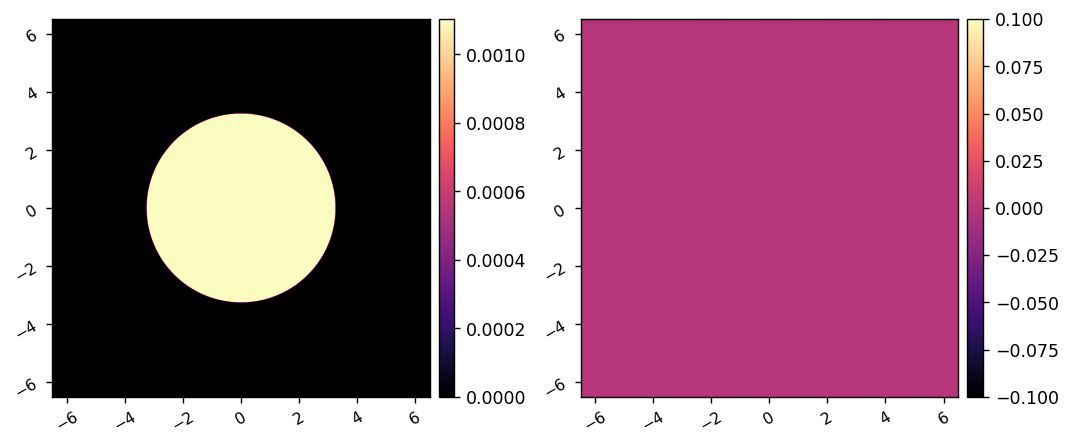

<Quantity 0.00634766 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E619787CA0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E619787CA0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E619653880>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E619653880> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


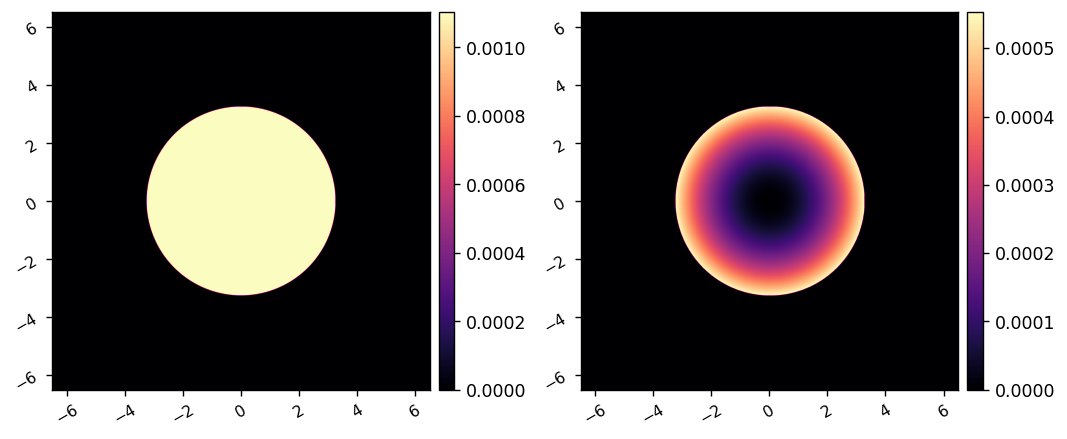

<Quantity 0.00634766 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E59ECF8310>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E59ECF8310> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E61C765B80>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E61C765B80> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


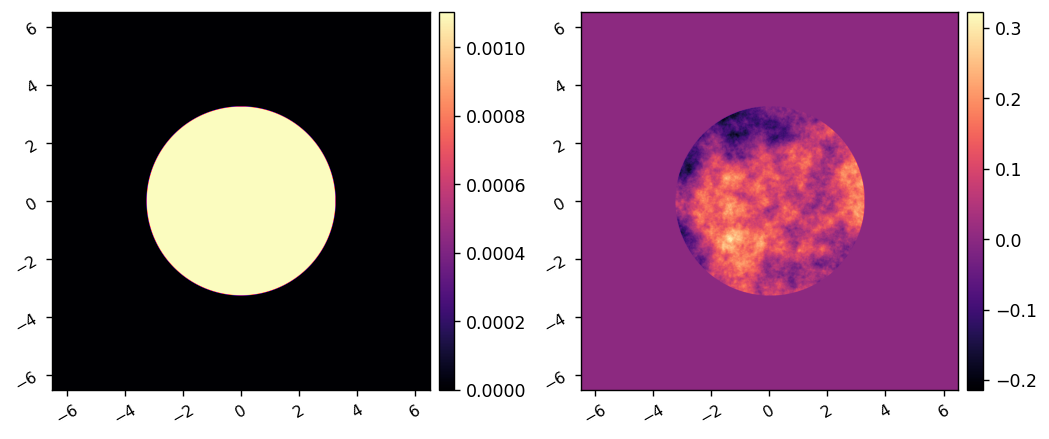

<Quantity 0.00634187 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E614D41520>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E614D41520> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E619FD7A00>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E619FD7A00> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


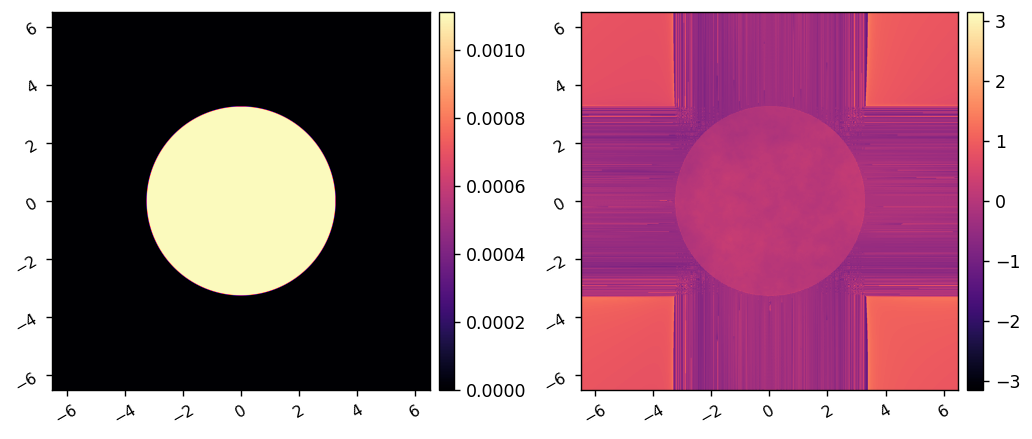

<Quantity 0.00634187 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E6048CA4F0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E6048CA4F0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E6196E1C40>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E6196E1C40> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


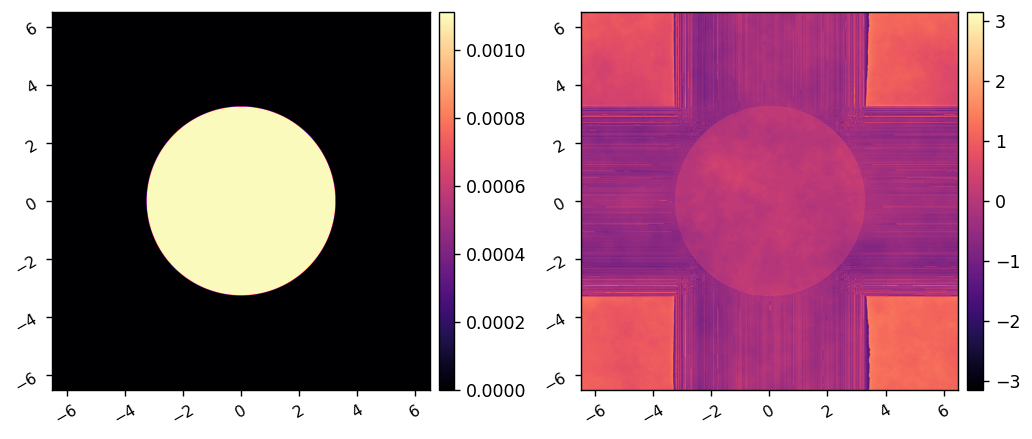

<Quantity 0.00639997 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E61F0A0D90>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E61F0A0D90> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E61EFE0C40>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E61EFE0C40> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


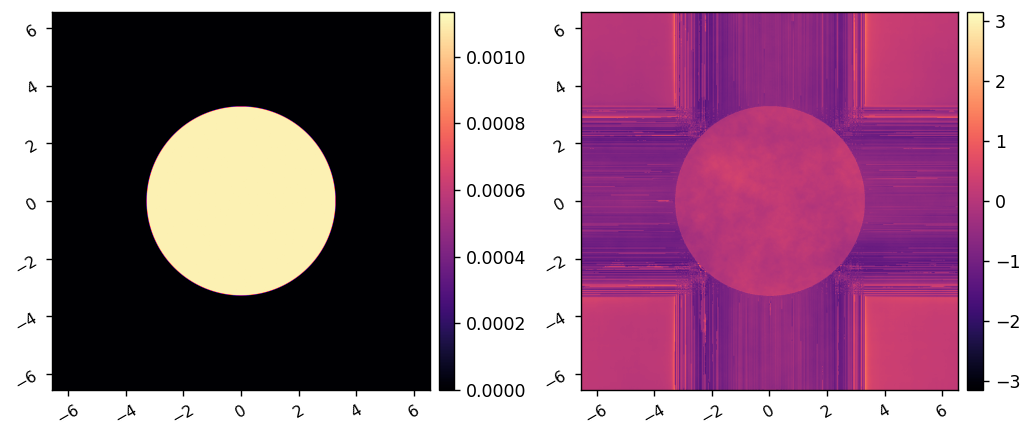

<Quantity 0.00639997 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E614D254C0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E614D254C0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E614CDBD30>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E614CDBD30> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


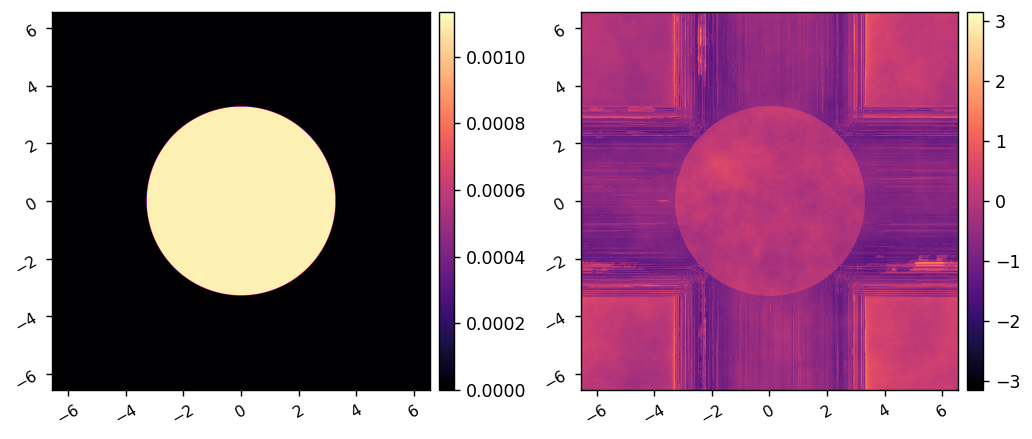

<Quantity 0.00639892 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E61A03B700>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E61A03B700> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E619A5ED60>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E619A5ED60> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


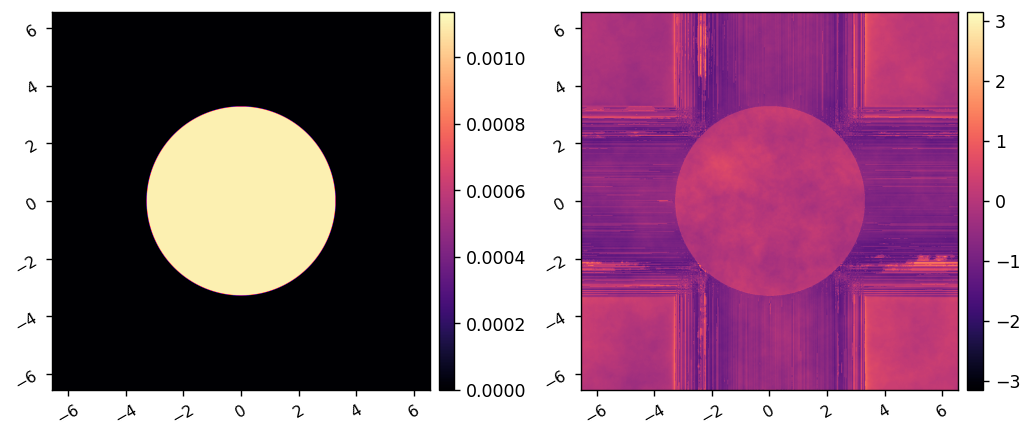

<Quantity 0.00639892 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E619BAD6A0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E619BAD6A0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E619666C10>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E619666C10> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


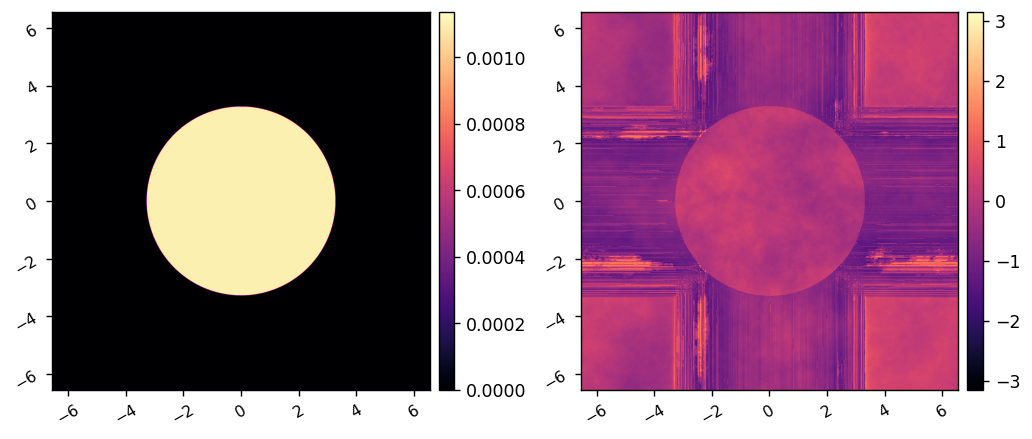

<Quantity 0.00639776 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E614ED7730>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E614ED7730> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E6119B4D90>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E6119B4D90> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


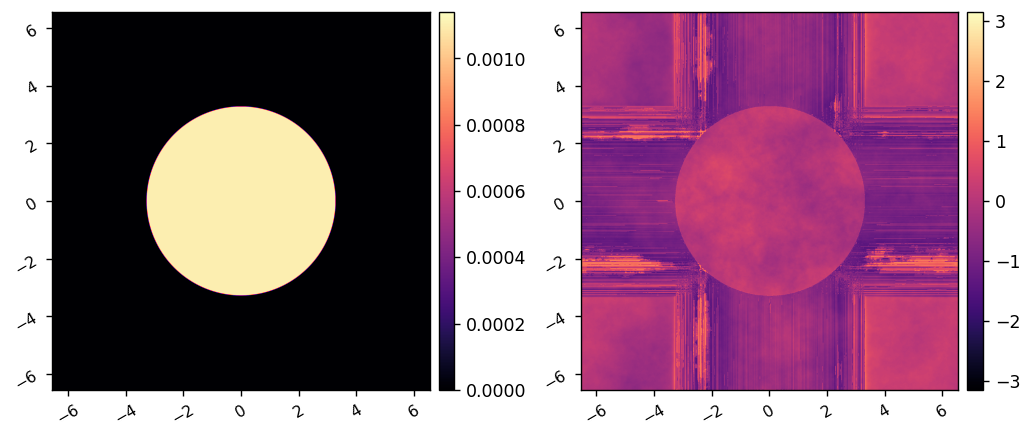

In [10]:
for i in range(len(wfs)):
    display(wfs[i].pixelscale)
    misc.imshow2(wfs[i].amplitude, wfs[i].phase, pxscl=wfs[i].pixelscale)